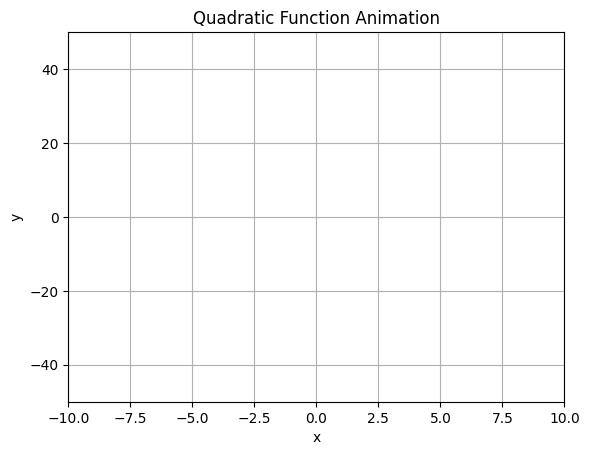

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the quadratic function
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

# Create a figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)
ax.set_ylim(-50, 50)

# Initialize the plot with an empty line
line, = ax.plot([], [], lw=2)

# Animation function to update the plot
def update(frame):
    a = frame / 10.0  # Vary the coefficient 'a' for animation
    b = 0
    c = 0

    x = np.linspace(-10, 10, 1000)
    y = quadratic_function(x, a, b, c)

    line.set_data(x, y)
    return line

# Create an animation
animation = FuncAnimation(fig, update, frames=np.arange(-10, 11), interval=200)

# Display the plot
plt.title('Quadratic Function Animation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [26]:
import pygame
import sys
import math
import random

# Initialize Pygame
pygame.init()

# Constants
WIDTH, HEIGHT = 800, 600
GRAVITY = 0.01
FPS = 60

# Colors
WHITE = (255, 255, 255)
RED = (255, 0, 0)

# Set up the display
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Projectile Game")

clock = pygame.time.Clock()

class Rocket:
    def __init__(self):
        self.x = 0
        self.y = HEIGHT
        self.velocity = 0
        self.angle = 45
        self.initial_velocity = 0

        # Store points to draw the quadratic function
        self.path_points = []

    def update(self):
        self.x += self.velocity * math.cos(math.radians(self.angle))
        self.y -= self.velocity * math.sin(math.radians(self.angle))
        self.velocity += GRAVITY

        # Store the current position for drawing the path
        self.path_points.append((int(self.x), int(self.y)))

    def draw(self):
        # pygame.draw.circle(screen, RED, (int(self.x), int(self.y)), 10)
        pygame.draw.circle(screen, RED, ((int(self.x), int(self.y))), 10)

    def draw_path(self):
        pygame.draw.lines(screen, RED, False, self.path_points, 2)

    def launch(self, initial_velocity):
        self.velocity = initial_velocity
        self.initial_velocity = initial_velocity

# Generate a random wall
wall_height = random.randint(50, 300)
wall_position = random.randint(500, 700)

# Main game loop
rocket = Rocket()
launched = False

while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_SPACE and not launched:
                rocket.launch(1)  # You can adjust the initial velocity here
                launched = True

    if launched:
        rocket.update()

    # Check if the rocket hits the wall
    if rocket.x >= wall_position and rocket.y >= HEIGHT - wall_height:
        print("Rocket cleared the wall!")
        pygame.quit()
        sys.exit()

    # Clear the screen
    screen.fill(WHITE)

    # Draw the wall
    pygame.draw.rect(screen, RED, (wall_position, HEIGHT - wall_height, 20, wall_height))

    # Draw the rocket
    rocket.draw()

    # Update the display
    pygame.display.flip()

    # Cap the frame rate
    clock.tick(FPS)

SystemExit: 